In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

import pmdarima as pm
from pmdarima.arima import auto_arima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/project02_dust/최종 데이터/Real_total/real_total_GD.csv')

df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소
0,2016-01-01 00:00:00,강동구,87.0,51.0,-1.9,0.0,0.0,1.0,북,0.004,1.2,0.002,0.050,서울 강동구 구천면로 42길 59
1,2016-01-01 01:00:00,강동구,82.0,44.0,-2.1,0.0,90.0,3.0,동,0.004,1.2,0.002,0.048,서울 강동구 구천면로 42길 59
2,2016-01-01 02:00:00,강동구,97.0,58.0,-2.2,0.0,0.0,1.0,북,0.004,1.1,0.002,0.044,서울 강동구 구천면로 42길 59
3,2016-01-01 03:00:00,강동구,88.0,53.0,-2.5,0.0,90.0,3.0,동,0.004,1.0,0.002,0.041,서울 강동구 구천면로 42길 59
4,2016-01-01 04:00:00,강동구,90.0,52.0,-2.9,0.0,70.0,2.0,북동,0.004,1.0,0.002,0.039,서울 강동구 구천면로 42길 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59
35057,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59
35058,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59
35059,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59


In [ ]:
df['일시'] = pd.to_datetime(df['일시'])

df['year'] = df['일시'].dt.year

df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소,year
0,2016-01-01 00:00:00,강동구,87.0,51.0,-1.9,0.0,0.0,1.0,북,0.004,1.2,0.002,0.050,서울 강동구 구천면로 42길 59,2016
1,2016-01-01 01:00:00,강동구,82.0,44.0,-2.1,0.0,90.0,3.0,동,0.004,1.2,0.002,0.048,서울 강동구 구천면로 42길 59,2016
2,2016-01-01 02:00:00,강동구,97.0,58.0,-2.2,0.0,0.0,1.0,북,0.004,1.1,0.002,0.044,서울 강동구 구천면로 42길 59,2016
3,2016-01-01 03:00:00,강동구,88.0,53.0,-2.5,0.0,90.0,3.0,동,0.004,1.0,0.002,0.041,서울 강동구 구천면로 42길 59,2016
4,2016-01-01 04:00:00,강동구,90.0,52.0,-2.9,0.0,70.0,2.0,북동,0.004,1.0,0.002,0.039,서울 강동구 구천면로 42길 59,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59,2019
35057,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59,2019
35058,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59,2019
35059,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59,2019


In [ ]:
datatt = df[['일시', '미세먼지(PM10)', '초미세먼지(PM25)', 'year']]
datatt = datatt.rename(columns = {'일시' : 'time', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25'})
datatt

,time,PM10,PM25,year
0,2016-01-01 00:00:00,87.0,51.0,2016
1,2016-01-01 01:00:00,82.0,44.0,2016
2,2016-01-01 02:00:00,97.0,58.0,2016
3,2016-01-01 03:00:00,88.0,53.0,2016
4,2016-01-01 04:00:00,90.0,52.0,2016
...,...,...,...,...
35056,2019-12-31 19:00:00,24.0,18.0,2019
35057,2019-12-31 20:00:00,23.0,17.0,2019
35058,2019-12-31 21:00:00,25.0,19.0,2019
35059,2019-12-31 22:00:00,24.0,17.0,2019


In [ ]:
data = datatt

data

,time,PM10,PM25,year
0,2016-01-01 00:00:00,87.0,51.0,2016
1,2016-01-01 01:00:00,82.0,44.0,2016
2,2016-01-01 02:00:00,97.0,58.0,2016
3,2016-01-01 03:00:00,88.0,53.0,2016
4,2016-01-01 04:00:00,90.0,52.0,2016
...,...,...,...,...
35056,2019-12-31 19:00:00,24.0,18.0,2019
35057,2019-12-31 20:00:00,23.0,17.0,2019
35058,2019-12-31 21:00:00,25.0,19.0,2019
35059,2019-12-31 22:00:00,24.0,17.0,2019


In [ ]:
df2020  = pd.read_csv('/content/drive/MyDrive/data/project02_dust/test_Data/서울시 대기질 자료 제공_2020-2021.csv', encoding = 'cp949')

df2020['일시'] = pd.to_datetime(df2020['일시'])

df2020['year'] = df2020['일시'].dt.year

df2020 = df2020[(df2020['구분'] == '강동구') & (df2020['year'] == 2020)]

df2020 = df2020.iloc[::-1].reset_index(drop = True)


df2020 = df2020.rename(columns = {'일시' : 'time', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25'})

df2020

,time,구분,PM10,PM25,year
0,2020-01-01 00:00:00,강동구,27.0,18.0,2020
1,2020-01-01 01:00:00,강동구,25.0,19.0,2020
2,2020-01-01 02:00:00,강동구,25.0,18.0,2020
3,2020-01-01 03:00:00,강동구,25.0,19.0,2020
4,2020-01-01 04:00:00,강동구,24.0,18.0,2020
...,...,...,...,...,...
8779,2020-12-31 19:00:00,강동구,40.0,21.0,2020
8780,2020-12-31 20:00:00,강동구,35.0,19.0,2020
8781,2020-12-31 21:00:00,강동구,34.0,20.0,2020
8782,2020-12-31 22:00:00,강동구,33.0,18.0,2020


In [ ]:
df2020.isna().sum()

,0
time,0
구분,0
PM10,150
PM25,126
year,0


In [ ]:
i = 0
while True:
    if df2020["PM10"].isna().sum() != 0:
        df2020['PM10'].fillna(df2020['PM10'].rolling(window = 3, min_periods = 1).mean(), inplace = True)
        print(f'{i+1} 번째 반복 중')
        i += 1
    else:
        break

df2020.isna().sum()

1 번째 반복 중
2 번째 반복 중
3 번째 반복 중
4 번째 반복 중
5 번째 반복 중
6 번째 반복 중
7 번째 반복 중
8 번째 반복 중
9 번째 반복 중
10 번째 반복 중
11 번째 반복 중
12 번째 반복 중
13 번째 반복 중
14 번째 반복 중


,0
time,0
구분,0
PM10,0
PM25,126
year,0


In [ ]:
df2020['time'] = pd.to_datetime(df2020['time'])

df2020.set_index('time', inplace = True)

test10 = df2020[['PM10']]

test10

,PM10
time,
2020-01-01 00:00:00,27.0
2020-01-01 01:00:00,25.0
2020-01-01 02:00:00,25.0
2020-01-01 03:00:00,25.0
2020-01-01 04:00:00,24.0
...,...
2020-12-31 19:00:00,40.0
2020-12-31 20:00:00,35.0
2020-12-31 21:00:00,34.0


In [ ]:
data['time'] = pd.to_datetime(data['time'])

data.set_index('time', inplace = True)

df10 = data[['PM10']]

df10

,PM10
time,
2016-01-01 00:00:00,87.0
2016-01-01 01:00:00,82.0
2016-01-01 02:00:00,97.0
2016-01-01 03:00:00,88.0
2016-01-01 04:00:00,90.0
...,...
2019-12-31 19:00:00,24.0
2019-12-31 20:00:00,23.0
2019-12-31 21:00:00,25.0


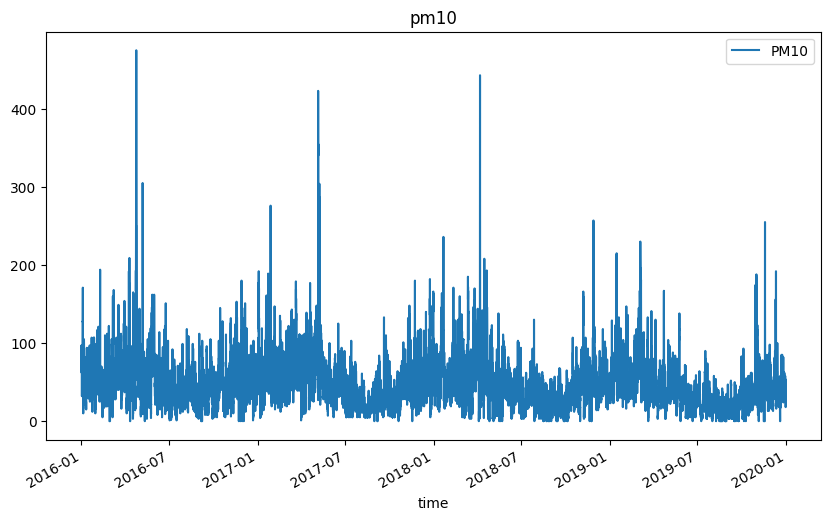

In [ ]:
df10.plot(figsize = (10, 6))
plt.title('pm10')

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

df10_diff = df10.diff().dropna()

df10_diff

result = adfuller(df10_diff)

print('ADF 검정통계량 : ', result[0])
print('ADF P-Value : ', result[1])

ADF 검정통계량 :  -36.38841404936345
ADF P-Value :  0.0


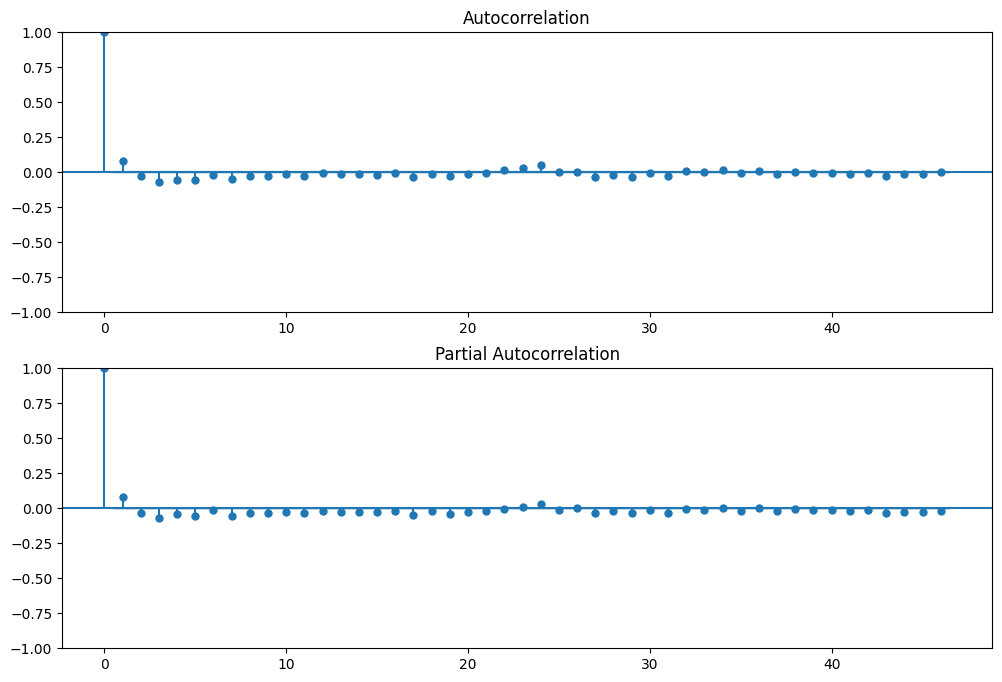

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8))

plot_acf(df10_diff, ax = ax[0])
plot_pacf(df10_diff, ax = ax[1])

plt.show()

# pdq = 2, 1, 2

In [ ]:
model = ARIMA(df10['PM10'], order = (2, 1, 2))

model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   PM10   No. Observations:                35061
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -127572.725
Date:                Sun, 22 Sep 2024   AIC                         255155.449
Time:                        13:01:38   BIC                         255197.774
Sample:                             0   HQIC                        255168.930
                              - 35061                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0737      0.025     43.045      0.000       1.025       1.123
ar.L2         -0.1393      0.024     -5.879      0.000      -0.186      -0.093
ma.L1         -1.0230      0.025    -40.274      0.0

In [ ]:
# 확인용 / 오류 없으려면 이 행 주석처리 후 9행부터 순서대로 시작

# df2020.reset_index().head(48)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 1000x600 with 0 Axes>

time
2020-03-01 00:00:00    26.504379
2020-03-01 01:00:00    27.970783
2020-03-01 02:00:00    29.335676
2020-03-01 03:00:00    30.596868
2020-03-01 04:00:00    31.760860
                         ...    
2020-05-31 19:00:00    45.658797
2020-05-31 20:00:00    45.658797
2020-05-31 21:00:00    45.658797
2020-05-31 22:00:00    45.658797
2020-05-31 23:00:00    45.658797
Name: predicted_mean, Length: 2208, dtype: float64


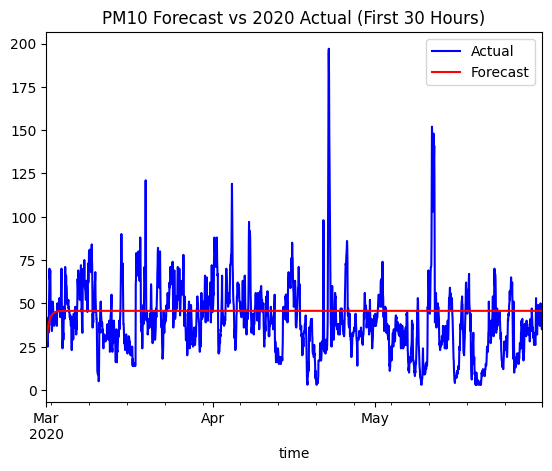

In [ ]:
# 1. 향후 30시간 예측
forecast = model_fit.forecast(steps = 2208)

forecast.reset_index(drop = True)

# 2. 예측 결과 시각화
plt.figure(figsize = (10, 6))

plt.show()

# 2020년 첫 30시간 데이터 선택
actual_data_2020 = test10.loc['2020-03-01':'2020-05-31']  # 날짜 범위 필터링
actual_data_2020_first_30 = actual_data_2020['PM10'].iloc[:2208]  # 앞 30개 선택

forecast.index = actual_data_2020_first_30.index # 인덱스 똑같이 만들어주기

print(forecast)

# 실제 값 시각화
actual_data_2020_first_30.plot(label = 'Actual', color = 'blue')
forecast.plot(label = 'Forecast', color = 'red')


plt.title('PM10 Forecast vs 2020 Actual (First 30 Hours)')
plt.legend()

plt.show()

In [ ]:
result_arima = pd.DataFrame({'실제값' : actual_data_2020_first_30, '예측값' : forecast})

result_arima['차이'] = result_arima['실제값'] - result_arima['예측값']

result_arima

,실제값,예측값,차이
time,,,
2020-03-01 00:00:00,36.0,26.504379,9.495621
2020-03-01 01:00:00,42.0,27.970783,14.029217
2020-03-01 02:00:00,36.0,29.335676,6.664324
2020-03-01 03:00:00,35.0,30.596868,4.403132
2020-03-01 04:00:00,28.0,31.760860,-3.760860
...,...,...,...
2020-05-31 19:00:00,37.0,45.658797,-8.658797
2020-05-31 20:00:00,40.0,45.658797,-5.658797
2020-05-31 21:00:00,37.0,45.658797,-8.658797


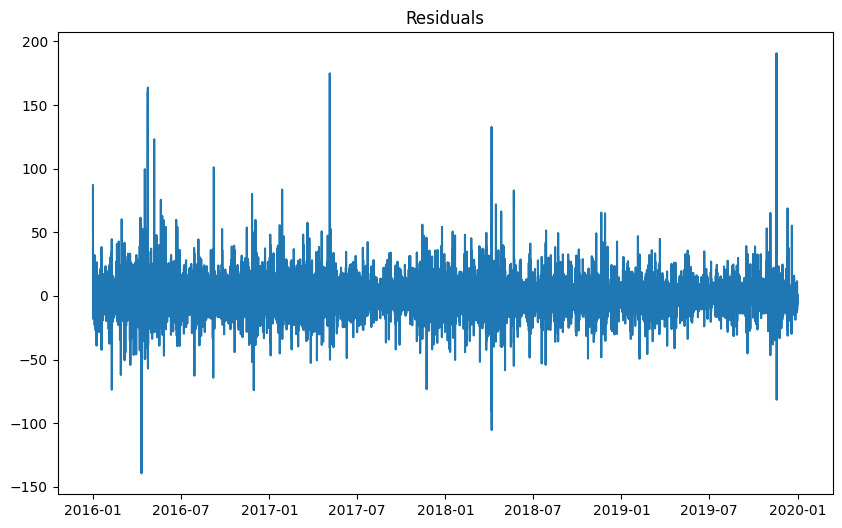

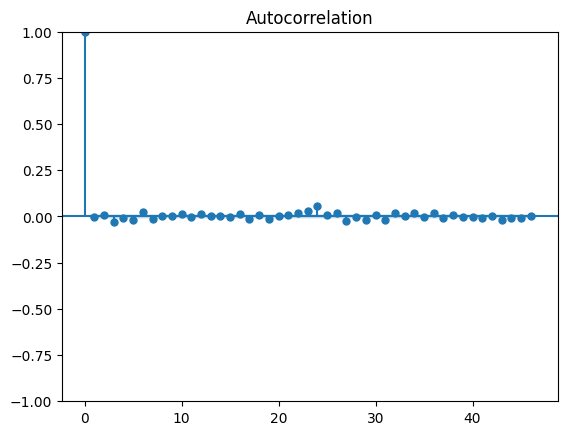

In [ ]:
# 잔차 계산
residuals = model_fit.resid

# 잔차 시각화 및 ACF 확인
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')

plot_acf(residuals)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual_data_2020_first_30, forecast)
print(f'MSE: {mse}')


MSE: 334.83086372766263


## Sarima

In [ ]:
df10

,PM10
time,
2016-01-01 00:00:00,87.0
2016-01-01 01:00:00,82.0
2016-01-01 02:00:00,97.0
2016-01-01 03:00:00,88.0
2016-01-01 04:00:00,90.0
...,...
2019-12-31 19:00:00,24.0
2019-12-31 20:00:00,23.0
2019-12-31 21:00:00,25.0


In [ ]:
train_data_sarima = df10.copy()

train_data_sarima

,PM10
time,
2016-01-01 00:00:00,87.0
2016-01-01 01:00:00,82.0
2016-01-01 02:00:00,97.0
2016-01-01 03:00:00,88.0
2016-01-01 04:00:00,90.0
...,...
2019-12-31 19:00:00,24.0
2019-12-31 20:00:00,23.0
2019-12-31 21:00:00,25.0


In [ ]:
# ram 용량을 못견뎌서 샘플링 해서 하는게 나을거같아요

# stepwise_model = auto_arima(train_data_sarima['PM10'],
#                             seasonal = True, m = 24,  # 계절성 적용, 하루 주기(m=24)
#                             trace = True,            # 파라미터 튜닝 과정 출력
#                             suppress_warnings = True,
#                             stepwise = True)         # 최적 파라미터를 단계별로 찾음

In [ ]:
sample = train_data_sarima['2019-03-01' : '2019-05-31']
sample

,PM10
time,
2019-03-01 00:00:00,92.0
2019-03-01 01:00:00,104.0
2019-03-01 02:00:00,101.0
2019-03-01 03:00:00,108.0
2019-03-01 04:00:00,108.0
...,...
2019-05-31 19:00:00,25.0
2019-05-31 20:00:00,22.0
2019-05-31 21:00:00,20.0


In [ ]:
stepwise_model = auto_arima(sample['PM10'],
                            seasonal = True, m = 24,  # 계절성 적용, 하루 주기(m=24)
                            trace = True,            # 파라미터 튜닝 과정 출력
                            suppress_warnings = True,
                            stepwise = True)         # 최적 파라미터를 단계별로 찾음

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=20.02 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=14940.281, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=14856.454, Time=2.33 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=14858.467, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=14938.328, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=14860.530, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=14847.005, Time=10.49 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=27.08 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=5.70 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=14931.771, Time=10.51 sec
 ARIMA(2,1,0)(2,0,0)[24] intercept   : AIC=14847.614, Time=15.25 sec
 ARIMA(1,1,1)(2,0,0)[24] intercept   : AIC=14848.091, Time=14.04 sec
 ARIMA(0,1,1)(2,0,0)[24] intercept   : AIC=14848.013, Time=11.89 sec
 ARIMA(2,1,1)(2,0,0)[24] intercept   : AIC=inf, Time=48.24 sec
 ARIMA(1,1,0)(2,0,0)[

In [ ]:
sarima_model = SARIMAX(sample['PM10'],
                       order=(1, 1, 0),
                       seasonal_order=(2, 0, 0, 24))

sarima_model_fit = sarima_model.fit()

print(sarima_model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               PM10   No. Observations:                 2208
Model:             SARIMAX(1, 1, 0)x(2, 0, 0, 24)   Log Likelihood               -7418.512
Date:                            Sun, 22 Sep 2024   AIC                          14845.024
Time:                                    13:05:35   BIC                          14867.821
Sample:                                03-01-2019   HQIC                         14853.353
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1970      0.014     13.929      0.000       0.169       0.225
ar.S.L24       0.0492      0.019   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Figure size 1000x600 with 0 Axes>

time
2020-03-01 00:00:00    26.504379
2020-03-01 01:00:00    27.970783
2020-03-01 02:00:00    29.335676
2020-03-01 03:00:00    30.596868
2020-03-01 04:00:00    31.760860
                         ...    
2020-05-31 19:00:00    45.658797
2020-05-31 20:00:00    45.658797
2020-05-31 21:00:00    45.658797
2020-05-31 22:00:00    45.658797
2020-05-31 23:00:00    45.658797
Name: predicted_mean, Length: 2208, dtype: float64


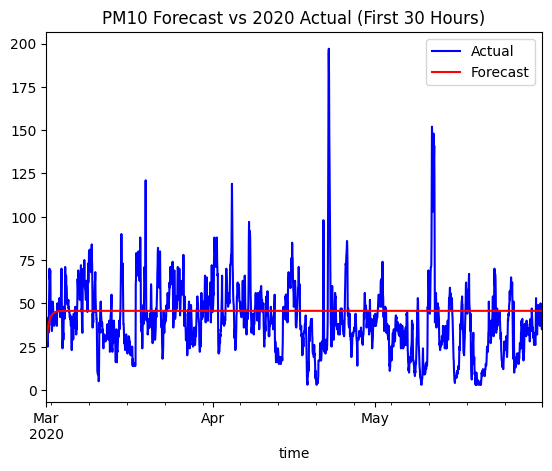

In [ ]:
# 1. 향후 30시간 예측
sprig = len(test10.loc['2020-03-01':'2020-05-31'])

forecast = model_fit.forecast(steps = sprig)

forecast.reset_index(drop = True)

# 2. 예측 결과 시각화
plt.figure(figsize = (10, 6))

plt.show()

# 2020년 첫 30시간 데이터 선택
actual_data_2020 = test10.loc['2020-03-01':'2020-05-31']  # 날짜 범위 필터링
actual_data_2020_spring = actual_data_2020['PM10'].iloc[:sprig]  # 앞 30개 선택

forecast.index = actual_data_2020_spring.index # 인덱스 똑같이 만들어주기

print(forecast)
actual_data_2020_spring

# 실제 값 시각화
actual_data_2020_spring.plot(label = 'Actual', color = 'blue')
forecast.plot(label = 'Forecast', color = 'red')


plt.title('PM10 Forecast vs 2020 Actual (First 30 Hours)')
plt.legend()

plt.show()

In [ ]:
sarima_result = pd.DataFrame({'실제값' : actual_data_2020_spring, "예측값" : forecast})

sarima_result

,실제값,예측값
time,,
2020-03-01 00:00:00,36.0,26.504379
2020-03-01 01:00:00,42.0,27.970783
2020-03-01 02:00:00,36.0,29.335676
2020-03-01 03:00:00,35.0,30.596868
2020-03-01 04:00:00,28.0,31.760860
...,...,...
2020-05-31 19:00:00,37.0,45.658797
2020-05-31 20:00:00,40.0,45.658797
2020-05-31 21:00:00,37.0,45.658797


In [ ]:
mse = mean_squared_error(actual_data_2020_spring, forecast)
print(f'MSE: {mse}')

MSE: 434.88356894263825
